In [1]:
import torch
from resnext50 import resnext50
from dataset import TestImageDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]


from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

def calcula_pred(red, dataset, batch_size=100):
    # base = []
    predicciones = []
    dataloader = DataLoader(dataset, batch_size)
    for x, lab in tqdm(dataloader):
        out = red.forward(x)
        _, max_idx = torch.max(out, dim=1)
        predicciones.append(max_idx)
    return predicciones

In [2]:
net = resnext50(img_channel=3, num_classes=19)
net.load_state_dict(torch.load(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Trained\best_ResNext_11.pth'))
net.eval()

ResNext(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BottleneckBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (residual): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, ep

In [4]:
test_dataset = TestImageDataset(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224)

In [5]:
pr = calcula_pred(red=net, dataset=test_dataset, batch_size=32)

predictions = [j for i in pr for j in i]

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [06:25<00:00,  6.43s/it]


In [7]:
len(predictions)

1900

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

In [8]:
ground_truth = []
for i in range(len(predictions)):
    ground_truth.append(test_dataset[i][1])

In [9]:
confusion_matrix(ground_truth, predictions)

array([[40,  0,  2, 24,  3,  4,  0,  5,  0,  3,  1,  2,  3,  0,  0,  3,
         1,  0,  9],
       [ 0,  6,  4,  3,  3,  4,  4,  0,  1,  0, 17,  1,  1,  0,  0, 52,
         1,  0,  3],
       [ 0,  4, 21,  3,  1, 12,  1,  1,  3,  0,  8,  2,  8,  0,  0, 35,
         1,  0,  0],
       [ 5,  0,  1, 53,  4,  3,  4,  0,  0,  3,  3,  0,  5,  1,  1,  6,
         2,  0,  9],
       [ 0,  0,  3, 10, 44,  5,  3,  1,  1,  3,  8,  1,  4,  0,  1, 15,
         0,  0,  1],
       [ 1,  2,  3,  8,  5, 23,  5,  0,  1,  2,  5,  2,  6,  0,  1, 34,
         0,  0,  2],
       [ 0,  2, 13,  5,  9, 22, 20,  0,  0,  2,  2,  1,  4,  0,  0, 18,
         1,  0,  1],
       [ 2,  0,  2,  2,  5,  5,  2, 45,  6,  1,  4,  1,  2,  0,  0,  4,
         0,  0, 19],
       [ 0,  0,  1,  2,  2,  2,  0,  0, 70,  4,  0,  0,  5,  1,  0,  0,
         1,  0, 12],
       [ 0,  0,  0,  3,  5,  1,  3,  1,  6, 60,  1,  3,  4,  1,  2,  2,
         1,  0,  7],
       [ 0,  1,  3,  9,  7,  8,  3,  0,  0,  1, 23,  2,  1,  0,  0, 39

In [10]:
data=[]
for i in range(len(predictions)):
    data.append([predictions[i].item(), ground_truth[i]])


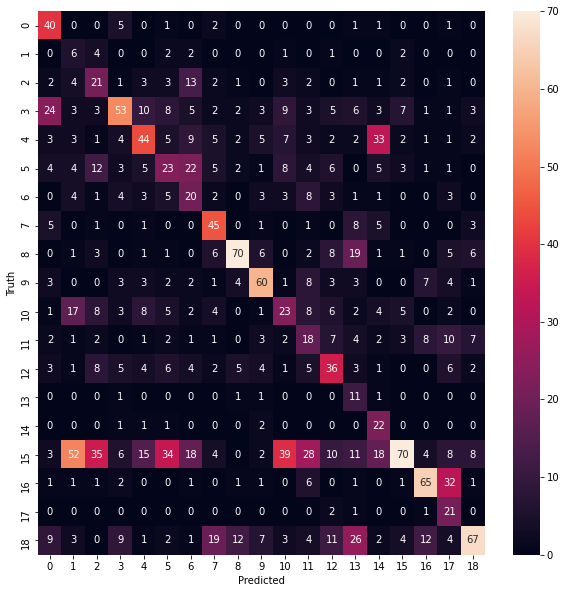

<Figure size 1080x1080 with 0 Axes>

In [11]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

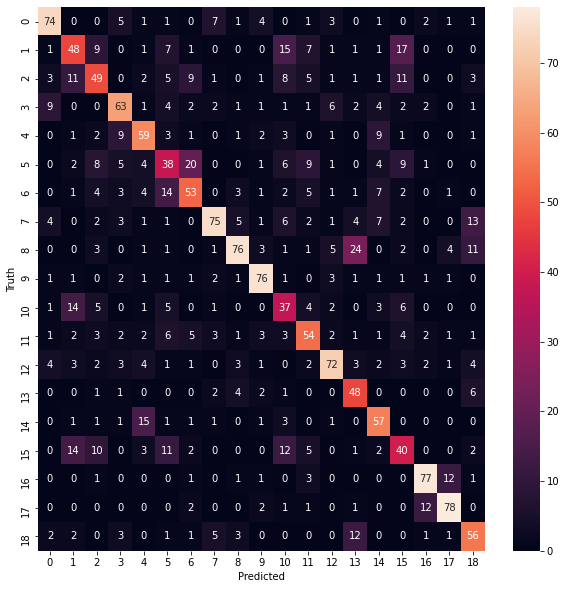

<Figure size 1080x1080 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [47]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

In [12]:
wrong=[]
cont= 0
for i in range(len(predictions)):
    boolean = predictions[i].item()==ground_truth[i]

    if boolean == False:
        wrong.append(i)
    else:
        cont += 1
    



In [26]:
cont/1900 *100

59.473684210526315

In [13]:
cont/1900 *100

37.631578947368425

In [14]:
wrong[0:5]

[0, 7, 8, 9, 10]

In [29]:
g = np.swapaxes(test_dataset[7][0], 0,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


hat 16


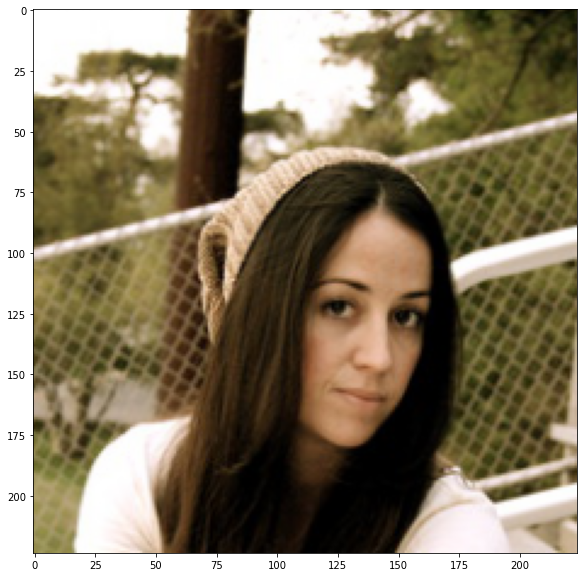

In [32]:
plt.imshow(g)
print(test_dataset.read_mapping()[predictions[7].item()], ground_truth[7])


In [26]:
print(predictions[2].item(),ground_truth[2])

6 15


In [91]:
wrong_class0 = []
cont0 = 0
for i in range(len(predictions)):
    if ground_truth[i] == 0 and predictions[i] == 0:
        cont0 += 1
    elif ground_truth[i] == 0 and predictions[i] != 0:
        wrong_class0.append(i)
        

In [84]:
def contar_veces(elemento, lista):
    veces = 0
    for i in lista:
        if elemento == i:
            veces += 1
    return veces

In [92]:
cont0/contar_veces(0,ground_truth) *100

74.0

In [95]:
wrong_class0[0:5]

[22, 53, 95, 147, 215]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


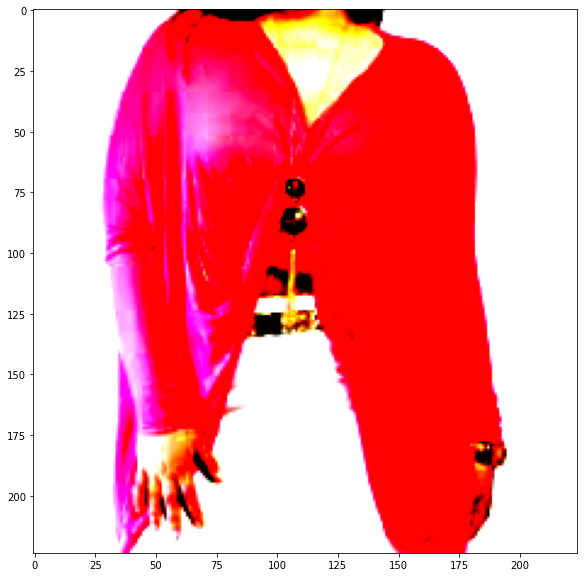

In [16]:
plt.imshow(np.swapaxes(test_dataset[0][0],0,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dress


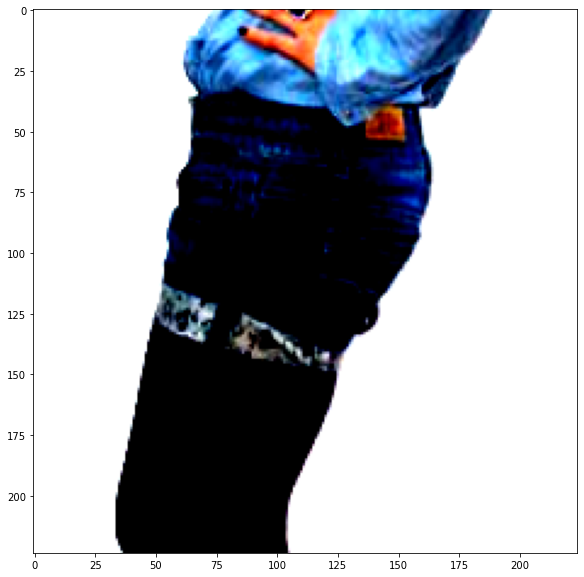

In [15]:
c0 = np.swapaxes(test_dataset[22][0], 0,2)
plt.imshow(c0)
print(test_dataset.read_mapping()[predictions[22].item()])

In [14]:
test_dataset.read_mapping()[0]

'shorts'

In [110]:
test_dataset.read_mapping()[predictions[22].item()]

'sweater'

In [186]:
def classes_wrong(pred,truth):
    errores = []
    accuracies = []
    for i in range(19):
        err = []
        contador = 0
        for j in range(len(predictions)):
            if ground_truth[j] == i and predictions[j] == i:
                contador += 1
            elif ground_truth[j] == i and predictions[j] != i:
                err.append(j)
        accuracies.append(contador / contar_veces(i, ground_truth))
        errores.append(err)
    return errores,accuracies

In [187]:
err, acc = classes_wrong(predictions,ground_truth)

In [188]:
acc

[0.74,
 0.48,
 0.49,
 0.63,
 0.59,
 0.38,
 0.53,
 0.75,
 0.76,
 0.76,
 0.37,
 0.54,
 0.72,
 0.48,
 0.57,
 0.4,
 0.77,
 0.78,
 0.56]

In [189]:
err[0]

[22,
 53,
 95,
 147,
 215,
 281,
 282,
 412,
 431,
 473,
 480,
 721,
 811,
 823,
 836,
 982,
 1072,
 1150,
 1209,
 1238,
 1317,
 1336,
 1411,
 1452,
 1636,
 1662]

In [33]:
test_dataset.read_mapping()

{0: 'shorts',
 1: 'jackets_parka',
 2: 'sweater',
 3: 'skirts',
 4: 'dress',
 5: 'blouse_shirts',
 6: 'tee',
 7: 'pants',
 8: 'shoes',
 9: 'belt',
 10: 'coat',
 11: 'scarf',
 12: 'bag',
 13: 'socks',
 14: 'jumper',
 15: 'blazer',
 16: 'hat',
 17: 'glasses',
 18: 'tights'}

In [39]:
print(predictions[0:10],ground_truth[0:10])

[tensor(5), tensor(6), tensor(6), tensor(15), tensor(0), tensor(18), tensor(7), tensor(16), tensor(4), tensor(18)] [5, 9, 15, 15, 0, 18, 18, 16, 14, 7]


In [14]:
print(predictions[0:10],ground_truth[0:10])


[tensor(10), tensor(9), tensor(15), tensor(15), tensor(0), tensor(18), tensor(18), tensor(18), tensor(4), tensor(18)] [5, 9, 15, 15, 0, 18, 18, 16, 14, 7]


In [33]:
t1 = torch.tensor([[1,2,3],[4,5,6]])
t2 = torch.tensor([[1,2,3],[4,5,6]])

t3 = torch.cat((t1,t2),dim=0)
t3

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]])

In [42]:
tr = [t1,t2]

[tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]])]

In [55]:
in_data = []
for i in range(64):
    in_data.append(test_dataset[i][0])

In [56]:
prueba=torch.stack(in_data)

In [58]:
y_test=net.forward(prueba)

In [26]:
t_d = []
for i in range(64):
    t_d.append(test_dataset[i][0])
    

In [71]:
torch.argmax(y_test[7])

tensor(18)

In [70]:
predictions[7]

tensor(18)

In [ ]:
len(tre)